In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

In [2]:
# Simulate data
np.random.seed(42)
n_samples = 100000
data = pd.DataFrame({
    'Contaminación': np.random.choice(['Alta', 'Baja'], size=n_samples, p=[0.1, 0.9]),
    'Fumador': np.random.choice(['Sí', 'No'], size=n_samples, p=[0.3, 0.7]),
    'Cáncer': np.random.choice(['Sí', 'No'], size=n_samples, p=[0.01163, 0.98837])
})

In [3]:
# Adjust probabilities based on contamination and smoking status
data.loc[(data['Contaminación'] == 'Alta') & (data['Fumador'] == 'Sí'), 'Cáncer'] = np.random.choice(['Sí', 'No'], p=[0.05, 0.95], size=len(data[(data['Contaminación'] == 'Alta') & (data['Fumador'] == 'Sí')]))
data.loc[(data['Contaminación'] == 'Alta') & (data['Fumador'] == 'No'), 'Cáncer'] = np.random.choice(['Sí', 'No'], p=[0.02, 0.98], size=len(data[(data['Contaminación'] == 'Alta') & (data['Fumador'] == 'No')]))
data.loc[(data['Contaminación'] == 'Baja') & (data['Fumador'] == 'Sí'), 'Cáncer'] = np.random.choice(['Sí', 'No'], p=[0.03, 0.97], size=len(data[(data['Contaminación'] == 'Baja') & (data['Fumador'] == 'Sí')]))
data.loc[(data['Contaminación'] == 'Baja') & (data['Fumador'] == 'No'), 'Cáncer'] = np.random.choice(['Sí', 'No'], p=[0.001, 0.999], size=len(data[(data['Contaminación'] == 'Baja') & (data['Fumador'] == 'No')]))

In [4]:
# Encode categorical variables
encoder = OrdinalEncoder()
X = encoder.fit_transform(data[['Contaminación', 'Fumador']])
y = data['Cáncer'].map({'No': 0, 'Sí': 1})

In [5]:
# Train Naive Bayes model
model = CategoricalNB()
model.fit(X, y)

# Predict probabilities for each combination
combinations = pd.DataFrame({
    'Contaminación': ['Alta', 'Alta', 'Baja', 'Baja'],
    'Fumador': ['Sí', 'No', 'Sí', 'No']
})
X_new = encoder.transform(combinations)
probs = model.predict_proba(X_new)

In [6]:
# Add probabilities to the combinations DataFrame
combinations['P(Cáncer = No)'] = probs[:, 0]
combinations['P(Cáncer = Sí)'] = probs[:, 1]

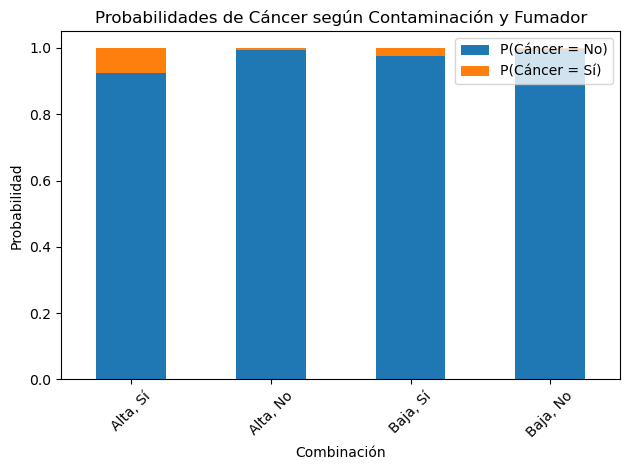

In [7]:
# Combine 'Contaminación' and 'Fumador' into a single label for the x-axis
combinations['Etiqueta'] = combinations.apply(lambda row: f"{row['Contaminación']}, {row['Fumador']}", axis=1)

# Plot the probabilities
combinations.plot(x='Etiqueta', y=['P(Cáncer = No)', 'P(Cáncer = Sí)'], kind='bar', stacked=True)
plt.title('Probabilidades de Cáncer según Contaminación y Fumador')
plt.xlabel('Combinación')
plt.ylabel('Probabilidad')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Save the plot
plt.savefig('probabilidades_condicionales_cancer_naive_bayes.png')
